#### What is Association Rule Learning Algorithm and Where is it Used?
Association Rule Learning is a rule-based machine learning technique used to discover interesting relationships, patterns, or associations among a set of items in large datasets. It is widely used in market basket analysis to understand customer purchase behavior, and it can also be applied in:

- Recommendation Systems: Suggesting products to users based on their purchase history.
- Web Usage Mining: Analyzing user navigation patterns on websites.
- Fraud Detection: Identifying unusual patterns that may indicate fraudulent activities.

#### Random Data for Association Rule Learning
Association Rule Learning often deals with categorical data, like transactions in a market basket. Here's an example of how to generate a simple dataset and visualize it:

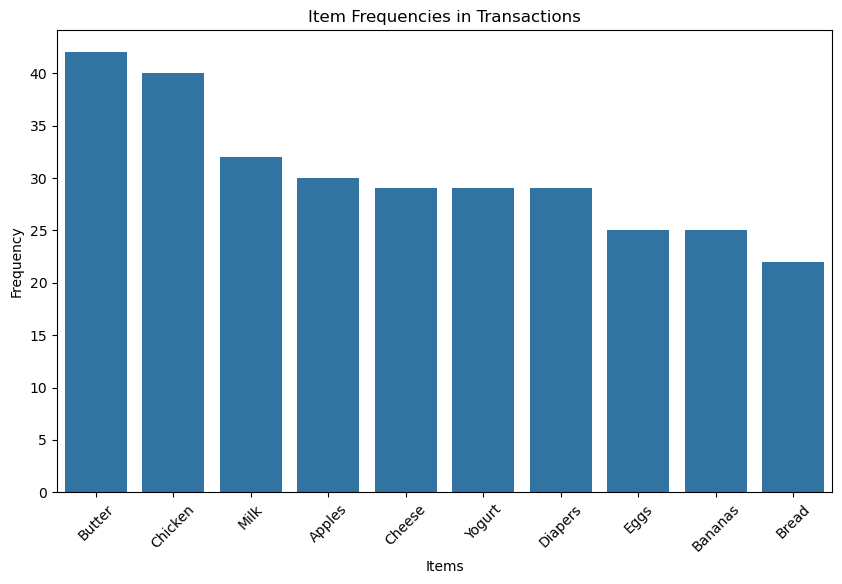

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define items and number of transactions
items = ['Bread', 'Milk', 'Eggs', 'Diapers', 'Cheese', 'Butter', 'Yogurt', 'Apples', 'Bananas', 'Chicken']
num_transactions = 100  # Total number of transactions to generate

# Generate a list of unique transaction IDs
transaction_ids = list(range(1, num_transactions + 1))

# Initialize an empty list to hold the transaction data
data = []

# Simulate transactions
for transaction_id in transaction_ids:
    # Randomly decide the number of items for this transaction (between 1 and 5)
    num_items = np.random.randint(1, 6)
    
    # Randomly select unique items for this transaction
    selected_items = np.random.choice(items, size=num_items, replace=False)
    
    # Append each selected item along with the transaction ID to the data list
    for item in selected_items:
        data.append({'Transaction': transaction_id, 'Item': item})

# Create a DataFrame from the generated data
df = pd.DataFrame(data)

# Count the occurrences of each item in the transactions
item_counts = df['Item'].value_counts()

# Plotting the item frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x=item_counts.index, y=item_counts.values)  # Create a bar plot for item frequencies
plt.title('Item Frequencies in Transactions')  # Set the title of the plot
plt.xlabel('Items')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot


#### Is Association Rule Learning Good for Only FBT or Some Other Cases?
While Association Rule Learning is commonly associated with Frequently Bought Together (FBT or Cross-selling: Identifying products that are often purchased together.) analysis, it is not limited to this. It can also be applied in:

- Customer Segmentation: Understanding common characteristics or behaviors among customers.
- Social Network Analysis: Discovering patterns in user interactions.

#### Implement Association Rule Learning from Scratch Using Numpy
Here's a simple implementation of the Apriori algorithm for Association Rule Learning:

Frequent Itemsets: [{frozenset({'Eggs'}): 25, frozenset({'Butter'}): 42, frozenset({'Chicken'}): 40, frozenset({'Cheese'}): 29, frozenset({'Yogurt'}): 29, frozenset({'Apples'}): 30, frozenset({'Diapers'}): 29, frozenset({'Milk'}): 32, frozenset({'Bananas'}): 25, frozenset({'Bread'}): 22}, {frozenset({'Chicken', 'Butter'}): 19, frozenset({'Butter', 'Cheese'}): 12, frozenset({'Apples', 'Butter'}): 14, frozenset({'Apples', 'Yogurt'}): 9, frozenset({'Yogurt', 'Butter'}): 15, frozenset({'Apples', 'Diapers'}): 10, frozenset({'Apples', 'Chicken'}): 13, frozenset({'Chicken', 'Diapers'}): 11, frozenset({'Butter', 'Milk'}): 16, frozenset({'Bananas', 'Milk'}): 11, frozenset({'Yogurt', 'Cheese'}): 9, frozenset({'Chicken', 'Cheese'}): 9, frozenset({'Yogurt', 'Chicken'}): 11, frozenset({'Apples', 'Eggs'}): 10, frozenset({'Eggs', 'Chicken'}): 12, frozenset({'Eggs', 'Milk'}): 8, frozenset({'Eggs', 'Butter'}): 16, frozenset({'Eggs', 'Yogurt'}): 8, frozenset({'Apples', 'Milk'}): 9, frozenset({'Yogurt', 

/var/folders/c8/fll6dgp97mnd842vr2qlbjr80000gr/T/ipykernel_29747/1176703372.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=support_df['Support'], y=support_df['Itemset'].astype(str), palette='viridis')


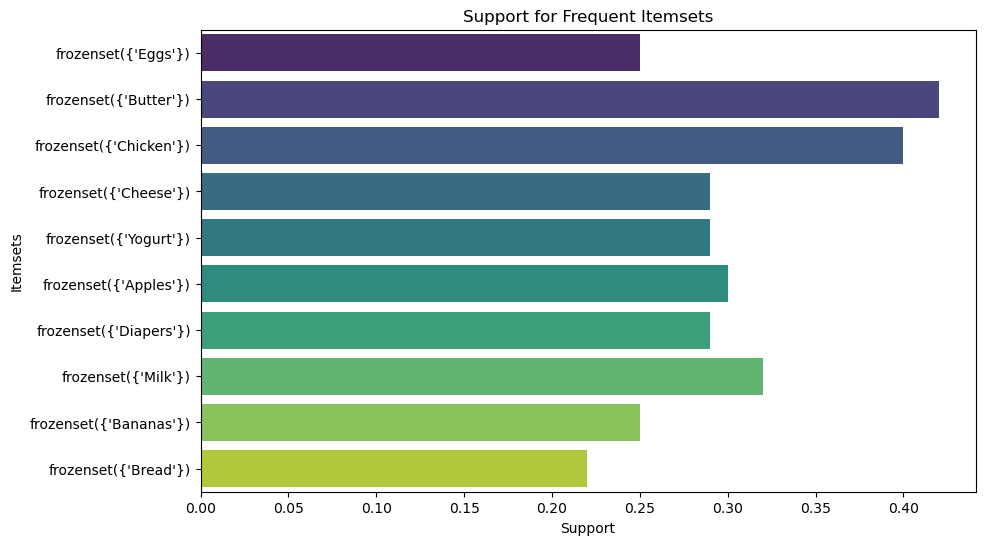

In [7]:
import pandas as pd
import numpy as np
from itertools import combinations

# Using the dataset generated previously
# Convert the DataFrame to a list of transactions (each transaction as a list of items)
transactions = df.groupby('Transaction')['Item'].apply(list).tolist()

def create_c1(transactions):
    """
    Create the candidate itemset C1, which contains individual items from transactions.
    
    Args:
        transactions (list): A list of transactions, where each transaction is a list of items.
        
    Returns:
        list: A list of frozen sets representing individual items.
    """
    c1 = []  # Initialize an empty list to hold candidate itemsets
    for transaction in transactions:
        for item in transaction:
            # If the item is not already in c1, add it
            if [item] not in c1:
                c1.append([item])
    return list(map(frozenset, c1))  # Convert each item list to a frozenset for immutability

def scan_d(transactions, candidates, min_support):
    """
    Scan transactions to determine the support of each candidate itemset.
    
    Args:
        transactions (list): A list of transactions.
        candidates (list): A list of candidate itemsets to evaluate.
        min_support (float): Minimum support threshold for an itemset to be considered frequent.
        
    Returns:
        tuple: A dictionary with itemsets as keys and their counts as values, 
               and a dictionary with itemsets as keys and their support as values.
    """
    item_count = {}  # Dictionary to hold counts of candidate itemsets
    for transaction in transactions:
        for candidate in candidates:
            # Check if the candidate is a subset of the transaction
            if candidate.issubset(transaction):
                if candidate not in item_count:
                    item_count[candidate] = 1  # Initialize count if candidate is found
                else:
                    item_count[candidate] += 1  # Increment count if candidate already exists
    num_items = float(len(transactions))  # Total number of transactions
    # Return item counts and the support of candidates that meet the minimum support threshold
    return (item_count, {k: v / num_items for k, v in item_count.items() if v / num_items >= min_support})

def apriori(transactions, min_support=0.5):
    """
    The main Apriori algorithm to generate frequent itemsets.
    
    Args:
        transactions (list): A list of transactions.
        min_support (float): Minimum support threshold for an itemset to be considered frequent.
        
    Returns:
        tuple: A list of lists of frequent itemsets found at each iteration and the support data.
    """
    c1 = create_c1(transactions)  # Create the initial candidate itemset C1
    freq_set, support_data = scan_d(transactions, c1, min_support)  # Scan for frequent itemsets
    freq_sets = [freq_set]  # List to hold frequent itemsets from each iteration
    k = 2  # Start with pairs of items
    
    # Continue generating itemsets while there are frequent itemsets
    while freq_set:
        # Generate new candidate itemsets by combining existing itemsets
        candidates = list(map(lambda x: frozenset(x), combinations(set().union(*freq_set), k)))
        freq_set, support_k = scan_d(transactions, candidates, min_support)  # Scan for new frequent itemsets
        if freq_set:
            support_data.update(support_k)  # Update support data with new itemsets
            freq_sets.append(freq_set)  # Add new frequent itemsets to the list
        k += 1  # Increment size for combinations
    return freq_sets, support_data  # Return all frequent itemsets and their support data

# Running Apriori on the transactions from the DataFrame
frequent_itemsets, support_data = apriori(transactions, min_support=0.2)

# Output the results
print("Frequent Itemsets:", frequent_itemsets)
print("Support Data:", support_data)

# Analyze support data for insights
support_df = pd.DataFrame(support_data.items(), columns=['Itemset', 'Support'])

# X-axis: Support values, which indicate the proportion of transactions that contain each itemset. A higher support value means the itemset appears in a larger fraction of transactions.
# Y-axis: Itemsets, which are combinations of items purchased together.
# This visualization helps identify which combinations of items are frequently bought together, providing insights into customer purchasing behavior that can be used for marketing strategies, product placements, or recommendation systems.
    
# Visualizing support data
plt.figure(figsize=(10, 6))
sns.barplot(x=support_df['Support'], y=support_df['Itemset'].astype(str), palette='viridis')
plt.title('Support for Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()


#### Association Rule Metrics

#### 1. Support
**Definition**: Support measures the frequency with which items appear together in a transaction set. It indicates how often a particular itemset appears in the dataset.

**Formula**:
$\text{Support}(X) = \frac{\text{Number of transactions containing } X}{\text{Total number of transactions}} $


#### 2. Confidence
**Definition**: Confidence measures the likelihood that item \(Y\) is purchased when item \(X\) is purchased. It indicates how often the rule is correct.

**Formula**:
$\text{Confidence}(X \rightarrow Y) = \frac{\text{Support}(X \cup Y)}{\text{Support}(X)} $

#### 3. Lift
**Definition**: Lift measures how much more likely items \(X\) and \(Y\) are to be bought together than expected if they were independent. A lift value greater than 1 indicates a positive correlation between the items.

**Formula**:
$text{Lift}(X \rightarrow Y) = \frac{\text{Confidence}(X \rightarrow Y)}{\text{Support}(Y)} = \frac{\text{Support}(X \cup Y)}{\text{Support}(X) \times \text{Support}(Y)} $


#### When to Use Association Rule Learning and When Not to Use It
#### When to Use:

- When you have transactional data, such as purchase histories.
- When the goal is to uncover hidden relationships between items.
- When building recommendation systems.

#### When Not to Use:

- When dealing with large datasets where computational cost is a concern (can be computationally expensive).
- When the relationships are more complex and require deeper analysis (e.g., sequential patterns).

#### What is the Loss Function?
Association Rule Learning does not have a conventional loss function like supervised learning. Instead, it uses measures like:

- Support: The proportion of transactions that contain a specific itemset.
- Confidence: The likelihood that an item appears in a transaction given that another item is present.
- Lift: The ratio of the observed support to that expected if the two items were independent.

#### How to Optimize the Algorithm
- Transaction Reduction: Reduce the dataset size by removing infrequent items before analysis.
- Efficient Data Structures: Use hash trees to store candidate itemsets for faster access.
- Parallel Processing: Implement parallel computing to speed up the support counting phase.

#### What Else Should You Know About Association Rule Learning?
- Interpretability: Association rules are generally easy to interpret but may not indicate causation.
- Scalability: The algorithms can become inefficient with large datasets; consider using more efficient algorithms like FP-Growth.
- Parameter Sensitivity: The results can vary significantly based on the chosen support and confidence thresholds.

A popular package for Association Rule Learning in Python is mlxtend. It provides implementations of the Apriori and FP-Growth algorithms, which are well-suited for market basket analysis and other association rule mining tasks. Let’s experiment with a real-world dataset using this package.

#### Installation
To install mlxtend, use the following command:
```bash
pip install mlxtend
```

#### Dataset
For experimentation, the Groceries dataset from Kaggle or a similar transactional dataset can be used. Get data here: https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset

#### Steps
- Load the Dataset: Convert transactions into the required format.
- Generate Frequent Itemsets: Using the Apriori algorithm.
- Extract Association Rules: Calculate rules based on minimum confidence and lift thresholds.

#### Example Code

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from tabulate import tabulate

# Load dataset
# For example, let's use a sample 'Groceries.csv' where each row represents a transaction
# Replace 'Groceries.csv' with your own transactional data file path
df = pd.read_csv('../dataset/Groceries_dataset.csv')
# Pretty-print the DataFrame as a table
print(tabulate(df.head(10), headers='keys', tablefmt='pretty'))
 

# Step 1: Prepare the one-hot encoded basket format
# Group items by 'Member_number' to represent each transaction
basket = df.groupby(['Member_number', 'itemDescription']).size().unstack(fill_value=0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Step 2: Generate frequent itemsets with a minimum support of 0.01
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Step 3: Extract association rules with a confidence threshold of 0.2
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

# Display results
print("Frequent Itemsets:\n", frequent_itemsets)
print("\nAssociation Rules:\n", rules.head())

## Explanation of Code:
# Group by Member_number and itemDescription: This groups items by each Member_number (unique shopper) and pivots them into columns, creating a one-hot encoding format where each item is represented as a column, and each row represents a transaction.

# One-hot Encoding with applymap: applymap(lambda x: 1 if x > 0 else 0) converts all values greater than 0 to 1, indicating item presence. This is required for the Apriori algorithm.

# Generate Frequent Itemsets: The apriori function with min_support=0.01 identifies frequent itemsets with at least 1% support across all transactions.

# Extract Association Rules: association_rules with min_threshold=0.2 extracts rules with at least 20% confidence.


+---+---------------+------------+------------------+
|   | Member_number |    Date    | itemDescription  |
+---+---------------+------------+------------------+
| 0 |     1808      | 21-07-2015 |  tropical fruit  |
| 1 |     2552      | 05-01-2015 |    whole milk    |
| 2 |     2300      | 19-09-2015 |    pip fruit     |
| 3 |     1187      | 12-12-2015 | other vegetables |
| 4 |     3037      | 01-02-2015 |    whole milk    |
| 5 |     4941      | 14-02-2015 |    rolls/buns    |
| 6 |     4501      | 08-05-2015 | other vegetables |
| 7 |     3803      | 23-12-2015 |    pot plants    |
| 8 |     2762      | 20-03-2015 |    whole milk    |
| 9 |     4119      | 12-02-2015 |  tropical fruit  |
+---+---------------+------------+------------------+


/var/folders/c8/fll6dgp97mnd842vr2qlbjr80000gr/T/ipykernel_29747/18981419.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
/Users/rshankar/anaconda3/envs/cv/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
        support                                           itemsets
0     0.015393                            (Instant food products)
1     0.078502                                         (UHT-milk)
2     0.031042                                    (baking powder)
3     0.119548                                             (beef)
4     0.079785                                          (berries)
...        ...                                                ...
3011  0.011031     (soda, whipped/sour cream, whole milk, yogurt)
3012  0.010518  (yogurt, other vegetables, bottled water, roll...
3013  0.013597  (yogurt, other vegetables, sausage, rolls/buns...
3014  0.010005  (yogurt, other vegetables, shopping bags, roll...
3015  0.013597  (yogurt, other vegetables, soda, whole milk, r...

[3016 rows x 2 columns]

Association Rules:
   antecedents         consequents  antecedent support  consequent support  \
0  (UHT-milk)     (bottled water)            0.078502            

#### Explanation
- Dataset Format: Each transaction is transformed into a one-hot encoded format.
- apriori(): Finds frequent itemsets that meet the min_support threshold.
- association_rules(): Derives rules using confidence and other metrics.

#### Tips for Real-World Data
- Adjust Support/Confidence: Lower thresholds help find less frequent, potentially valuable rules.
- Data Preprocessing: Ensure that data is clean and organized in a one-hot encoded format.
- Experiment with Metrics: Use lift, leverage, and conviction as additional metrics for filtering rules.


Apache Spark provides a built-in library for performing Association Rule Learning through its MLlib library. You can use the FP-Growth algorithm, which is often more efficient than the Apriori algorithm for larger datasets. Here’s how you can perform Association Rule Learning using PySpark.

```bash
$ docker run -it --rm \
  -v $(pwd)/dataset:/dataset \
  -v $(pwd)/notebooks/association_rule_learning_pyspark.py:/app/association_rule_learning_pyspark.py \
  bitnami/spark:latest /bin/bash

$ spark-submit association_rule_learning_pyspark.py
```


#### Matrix Factorization for Cross-Selling
Matrix factorization can be effectively used for cross-selling in e-commerce and retail scenarios.

#### How It Works:

- User-Item Matrix: Matrix factorization techniques decompose the user-item interaction matrix into latent factors representing users and items.
- Recommendation Generation: By learning these latent factors, the model can predict how likely a user is to purchase an item they haven't interacted with yet.
- Cross-Selling Potential: This capability allows businesses to identify additional products that users are likely to be interested in based on their previous purchase history, thereby facilitating cross-selling.

#### Benefits:

- Personalization: Provides tailored recommendations to individual users.
- Scalability: Efficiently handles large datasets typical in e-commerce.
- Improved Sales: Increases the chances of additional sales through targeted recommendations.

In [11]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load dataset
df = pd.read_csv('../dataset/Groceries_dataset.csv')

# Preview the dataset
print(tabulate(df.head(10), headers='keys', tablefmt='pretty'))

# Step 1: Prepare data for matrix factorization
# Convert the dataframe into a format suitable for the Surprise library
reader = Reader(rating_scale=(0, 1))  # In this case, we use a binary scale (0 or 1)

# We need to create a user-item matrix from the dataframe
# Each row represents a Member_number and their interaction with an item (presence/absence)
basket = df.groupby(['Member_number', 'itemDescription']).size().unstack(fill_value=0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)
basket.reset_index(inplace=True)

# Convert the one-hot encoded basket to a long format
basket_melted = basket.melt(id_vars='Member_number', value_vars=basket.columns[1:], 
                             var_name='itemDescription', value_name='interaction')

# Filter to keep only interactions
basket_melted = basket_melted[basket_melted['interaction'] > 0]

# Create a Surprise Dataset
data = Dataset.load_from_df(basket_melted[['Member_number', 'itemDescription', 'interaction']], reader)

# Step 2: Train a model using SVD
trainset, testset = train_test_split(data, test_size=0.2)

# Use SVD for matrix factorization
model = SVD()
model.fit(trainset)

# Step 3: Make predictions and evaluate the model
predictions = model.test(testset)
accuracy.rmse(predictions)

# Step 4: Predict FBT for a given item
# Let's assume we want to find items frequently bought together with 'whole milk'
item_to_predict = 'whole milk'
members = basket['Member_number'].unique()

# Create predictions for all members for the specified item
predicted_fbt = []
for member in members:
    pred = model.predict(member, item_to_predict)
    predicted_fbt.append((member, item_to_predict, pred.est))

# Convert to DataFrame for easier viewing
predicted_df = pd.DataFrame(predicted_fbt, columns=['Member_number', 'Item', 'Predicted Rating'])
predicted_df.sort_values(by='Predicted Rating', ascending=False, inplace=True)

# Display the top predictions
print("\nTop Predictions for 'whole milk':\n", predicted_df.head())


+---+---------------+------------+------------------+
|   | Member_number |    Date    | itemDescription  |
+---+---------------+------------+------------------+
| 0 |     1808      | 21-07-2015 |  tropical fruit  |
| 1 |     2552      | 05-01-2015 |    whole milk    |
| 2 |     2300      | 19-09-2015 |    pip fruit     |
| 3 |     1187      | 12-12-2015 | other vegetables |
| 4 |     3037      | 01-02-2015 |    whole milk    |
| 5 |     4941      | 14-02-2015 |    rolls/buns    |
| 6 |     4501      | 08-05-2015 | other vegetables |
| 7 |     3803      | 23-12-2015 |    pot plants    |
| 8 |     2762      | 20-03-2015 |    whole milk    |
| 9 |     4119      | 12-02-2015 |  tropical fruit  |
+---+---------------+------------+------------------+


/var/folders/c8/fll6dgp97mnd842vr2qlbjr80000gr/T/ipykernel_29747/2122738458.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


RMSE: 0.0339

Top Predictions for 'whole milk':
       Member_number        Item  Predicted Rating
1949           3005  whole milk               1.0
3197           4285  whole milk               1.0
3229           4317  whole milk               1.0
1682           2733  whole milk               1.0
3227           4315  whole milk               1.0


In [12]:
# Step 4: Predict FBT for a given item
# Get all items from the basket
all_items = basket.columns[1:]  # Assuming the first column is Member_number

# Create predictions for all members for all items
predicted_fbt = []
for member in members:
    for item in all_items:
        pred = model.predict(member, item)
        predicted_fbt.append((member, item, pred.est))

# Convert to DataFrame for easier viewing
predicted_df = pd.DataFrame(predicted_fbt, columns=['Member_number', 'Item', 'Predicted Rating'])

# Filter for predictions with 'whole milk' interactions
predicted_df = predicted_df[predicted_df['Item'] != 'whole milk']
predicted_df.sort_values(by='Predicted Rating', ascending=False, inplace=True)

# Display the top predictions
print("\nTop Predictions for items frequently bought together with 'whole milk':\n", predicted_df.head())



Top Predictions for items frequently bought together with 'whole milk':
         Member_number                   Item  Predicted Rating
0                1000  Instant food products               1.0
361665           3227                popcorn               1.0
361714           3227                waffles               1.0
361713           3227                vinegar               1.0
361712           3227                 turkey               1.0


#### Youtube videos

#### Inspiration for Associate Rule Learning
[Inspiration for Associate Rule Learning](https://www.youtube.com/watch?v=vA3m2IngcUU)
<iframe width="560" height="315" src="https://www.youtube.com/embed/vA3m2IngcUU" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

#### Apriori Algorithm Association Rule Learning
[Apriori Algorithm Association Rule Learning](https://www.youtube.com/watch?v=T3Pd_3QP9J4)

<iframe width="560" height="315" src="https://www.youtube.com/embed/T3Pd_3QP9J4" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
